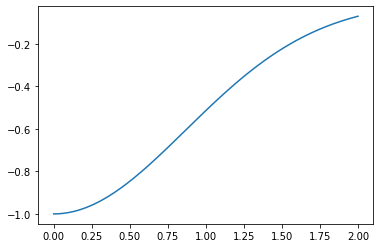

0.2
-0.8988169072661559 -0.8986795422232662 0.0001373650428897477
11 [0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998]
11 [-1, -0.9736834061234768, -0.8988169072661559, -0.7866126825924837, -0.6526607377973155, -0.5133936156860931, -0.3828653357939096, -0.2706830727788978, -0.18140882843396855, -0.11522269329664116, -0.06931530010950017]


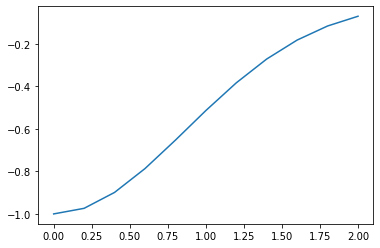

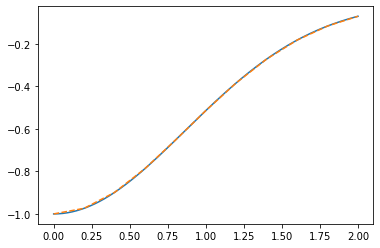

11 [0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998]
11 [-1, -1.0, -0.9217534370047334, -0.8029417719392252, -0.6607510104736171, -0.5134199385337378, -0.37647924973413205, -0.2603352033012811, -0.16960684067387993, -0.1039687673401048, -0.05984198696240437]


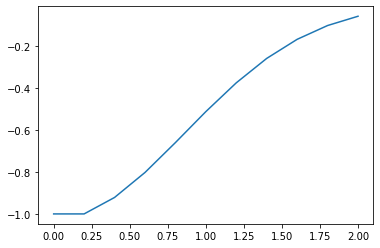

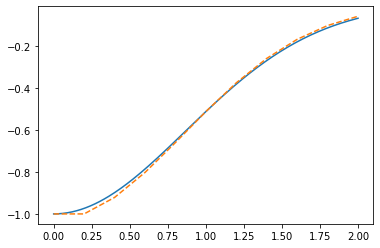

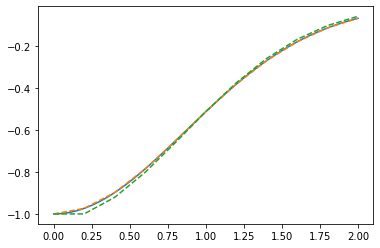

Max погр. метод Рунге-Кутта:  0.0001681511133014013
Max погр. метод Эйлера:  0.026314250646854997


,X,Точное решение,Метод Рунге-Кутта,Метод Эйлера,Погр. метод Рунге-Кутта,Погр. метод Эйлера
0,0.0,-1.000000,-1.000000,-1.000000,0.000000,0.000000
1,0.2,-0.973686,-0.973683,-1.000000,0.000002,0.026314
2,0.4,-0.898825,-0.898817,-0.921753,0.000008,0.022928
3,0.6,-0.786628,-0.786613,-0.802942,0.000015,0.016314
4,0.8,-0.652681,-0.652661,-0.660751,0.000020,0.008070
5,1.0,-0.513417,-0.513394,-0.513420,0.000024,0.000003
6,1.2,-0.382893,-0.382865,-0.376479,0.000028,0.006414
7,1.4,-0.270721,-0.270683,-0.260335,0.000038,0.010386
8,1.6,-0.181470,-0.181409,-0.169607,0.000061,0.011863
9,1.8,-0.115325,-0.115223,-0.103969,0.000102,0.011356


In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


# Точное решение
def func1(x):
    return -1 * np.exp((-2*x**2)/3)

y = lambda x: func1(x)
x = np.linspace(0, 2, 200)

plt.plot(x, y(x), '-')
plt.show()

# Метод Рунге-Кутта
def func2(x,y):
    return 2*x * (y**(-2) * np.exp(-2*x**2) - y) / 3

def methodRungeKuttaIV(y0, x0, h0):
    x1 = x0 + h0
    f1 = func2(x0,y0)
    f2 = func2(x0 + h0/2, y0 + h0/2 * f1)
    f3 = func2(x0 + h0/2, y0 + h0/2 * f2)
    f4 = func2(x1, y0 + h0 * f3)
    return y0 + h0/6 * (f1 + 2*f2 + 2*f3 + f4)

# расчет y2 c шагом h
def findY2(x0,y0,h):
    x1 = x0 + h
    y1 = methodRungeKuttaIV(y0, x0, h)
    return methodRungeKuttaIV(y1, x1, h)

# расчет y2 c шагом 2h
def findY22(x0,y0,h):
    return methodRungeKuttaIV(y0, x0, h * 2)

# погрешность
def error(y2, y22):
    return np.abs(y2 - y22)

# вычисление шага
def findh0(a,b,x0,y0,h):
    y2 = findY2(x0,y0,h)
    y22 = findY22(x0,y0,h)

    while (error(y2, y22) < 0.0001):
        h *= 2
        y2 = findY2(x0,y0,h)
        y22 = findY22(x0,y0,h)
    
    n = (b - a) / h
    if (n % 2 != 0): 
        n += 1 

    return b / n

a = 0
b = 2

y0 = -1
x0 = 0

h = 0.1

h0 = findh0(a,b,x0,y0,h)
print(h0)

y2 = findY2(x0,y0,h0)
y22 = findY22(x0,y0,h0)
err = error(y2, y22)
print(y2, y22, err)

xx = []
buff = 0
while (buff <= b):
    xx.append(buff)
    buff += h0

print(len(xx), xx)

yy = [y0]
for i in range(len(xx) - 1):
    yy.append(methodRungeKuttaIV(yy[i], xx[i], h0)) 

print(len(yy), yy)

plt.plot(xx, yy, '-')
plt.show()

plt.plot(x, y(x), '-', xx, yy, '--')
plt.show()

# Метод Эйлера
def methodElera(y0, x0, h0):
    return y0 + h0 * func2(x0,y0)

xxx = []
buff = 0
while (buff <= b):
    xxx.append(buff)
    buff += h0

print(len(xxx), xxx)

yyy = [y0]
for i in range(len(xxx) - 1):
    yyy.append(methodElera(yy[i], xx[i], h0)) 

print(len(yyy), yyy)

plt.plot(xxx, yyy, '-')
plt.show()

plt.plot(x, y(x), '-', xxx, yyy, '--')
plt.show()

plt.plot(x, y(x), '-', xx, yy, '--', xxx, yyy, '--')
plt.show()

table = []
d_yy_max = 0
d_yyy_max = 0
for i in range(len(xx)):
    d_yy = np.abs(y(xx[i]) - yy[i])
    d_yyy = np.abs(y(xx[i]) - yyy[i])
    table.append([xx[i], y(xx[i]), yy[i], yyy[i], d_yy, d_yyy])

    if (d_yy_max < d_yy): 
      d_yy_max = d_yy
    if (d_yyy_max < d_yyy): 
      d_yyy_max = d_yyy



print("Max погр. метод Рунге-Кутта: ", d_yy_max)
print("Max погр. метод Эйлера: ", d_yyy_max)

pd.DataFrame(table, columns=["X","Точное решение", "Метод Рунге-Кутта", "Метод Эйлера", "Погр. метод Рунге-Кутта", "Погр. метод Эйлера"])

